# SANTANDER DATA MASTER - CIENTISTA DE DADOS

### Introdução: Análise Exploratória dos Dados e Balanceamento das bases

In [ ]:
!pip install matplotlib
!pip install seaborn

In [5]:
#Imports

#Manipulação dos Dados
import pandas as pd
import numpy as np

#Visualização dos Dados
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

import pickle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

Vamos começar importando as bases de treino e teste disponilizadas.

In [7]:
#Importar os arquivos de treino e teste
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

print(df_train.shape, df_test.shape) 

(76020, 371) (75818, 370)


Verificando as informações de cada base.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


Ao avaliar as suas informações:
- Todos os campos são númericos, sendo que a maioria apresenta tipo int64
- Percebe-se que há 371 na base de treino e 370 em teste, sendo a coluna TARGET a diferença das duas. A mesma será utilizada para identificar os clientes satisfeitos (0) e insatisfeitos (1).

Vamos analisar as principais descrições estatísticas das bases.

In [10]:
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [11]:
df_test.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,...,0.160595,12.438559,1.327408,17.469991,12.674349,63.597839,11.404505,95.973025,70.504319,1.173863e+05
std,43882.370827,39752.473358,12.932000,1694.873886,364.211245,606.431562,133.383326,239.701416,34.028605,42.336668,...,32.441677,958.651673,170.449935,1252.618781,895.165516,3754.668953,1061.858193,4658.871575,3318.527783,2.479384e+05
min,2.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03
25%,37840.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.754961e+04
50%,75810.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057643e+05
75%,113996.500000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183159e+05
max,151837.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,8030.160000,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,496198.080000,354260.730000,2.889440e+07


Logo de início, percebemos um outlier interessante na 'var3' de -999999. É um caso que trataremos mais adiante, já que o máximo dessa coluna é 238 e seus quartis apresentam o mesmo valor (2).

### 1. Verificar valores nulos

In [25]:
df_train.isnull().sum().sum()

0

In [26]:
df_test.isnull().sum().sum()

0

Não há ocorrências de valores nulos em nenhuma das bases

### 2. Verificar colunas com variância zero ou nula

In [8]:
#código para remover colunas com variância zero ou nula
i=0
for col in df_train.columns:
    if df_train[col].var()==0:
        i+=1
        del df_train[col]
        del df_test[col]
i, df_train.shape, df_test.shape

(34, (76020, 337), (75818, 336))

Foram removidas 34 variáveis das duas bases.

### 3. Verificar colunas duplicadas

In [9]:
def getDuplicateColumns(df):
 
    duplicateColumnNames = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [10]:
duplicateColNames = getDuplicateColumns(df_train)

In [11]:
duplicateColNames, len(duplicateColNames)

(['num_var32',
  'ind_var29_0',
  'num_var25',
  'saldo_var29',
  'saldo_medio_var13_medio_ult1',
  'ind_var29',
  'delta_num_trasp_var17_out_1y3',
  'delta_num_trasp_var33_out_1y3',
  'ind_var18',
  'num_var37',
  'num_var29',
  'num_var39',
  'ind_var39',
  'delta_num_trasp_var33_in_1y3',
  'ind_var13_medio',
  'ind_var37',
  'num_var26',
  'delta_num_trasp_var17_in_1y3',
  'ind_var25',
  'num_var18',
  'ind_var32',
  'num_var29_0',
  'delta_num_reemb_var33_1y3',
  'num_var34',
  'ind_var34',
  'ind_var26',
  'delta_num_reemb_var17_1y3',
  'delta_num_reemb_var13_1y3',
  'num_var13_medio'],
 29)

Foram encontradas 29 colunas duplicadas na base de treino.

In [12]:
df_train = df_train.drop(columns = getDuplicateColumns(df_train))

In [13]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


Retirando as colunas duplicadas, ficamos com 308. Vamos remover na base de teste.

In [14]:
df_test = df_test.drop(columns = duplicateColNames)
df_test

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


### 4. Verificar colunas dispersas

In [15]:
#removing sparse features
i=0
for col in df_train.columns: #reomving all sparse features
    if np.percentile(df_train[col],99)==0:
        i+=1
        del df_train[col]
        del df_test[col]

In [16]:
df_train.shape, df_test.shape, i

((76020, 143), (75818, 142), 165)

Removemos 165 variáveis dispersas, agora a quantidade de colunas está mais enxuta! Mas vamos continuar.

### 5. Entendendo a coluna TARGET

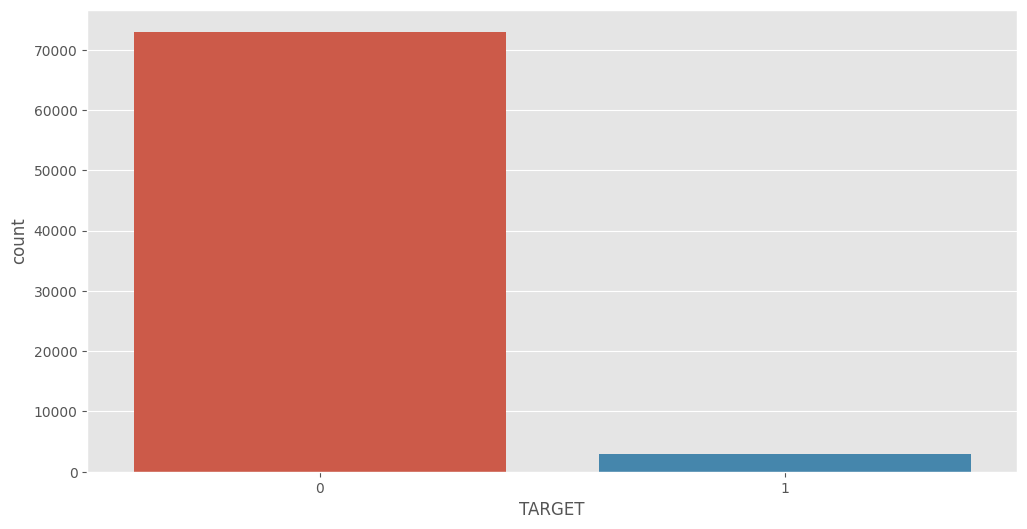

In [17]:
sns.countplot(x=df_train['TARGET']);

In [18]:
np.unique(df_train['TARGET'], return_counts=True)

(array([0, 1], dtype=int64), array([73012,  3008], dtype=int64))

In [19]:
(df_train['TARGET'].value_counts()/df_train['TARGET'].count())*100

0    96.043147
1     3.956853
Name: TARGET, dtype: float64

Na base de treino, percebe-se que 96% dos registros são de clientes satisfeitos (1). Isso é um ótimo sinal já que indica que o Santander possui um bom atendimento, refletido no alto percentual de satisfação. E temos 4% de clientes insatisfeitos, que será nosso foco de identificá-los para tomarmos as ações de retenção.
Outro ponto identificado é o desbalanceamento da base, logo vamos avaliar um processo (undersampling ou oversampling) para equalizar os registros e aprimorar nosso algoritmo.

### 6. Analisando variáveis específicas

### Coluna var3

Como dito anteriormente, essa coluna possui indícios de outliers. Vamos analisar os registros únicos:

In [20]:
np.array(sorted(df_train.var3.unique()))

array([-999999,       0,       1,       2,       3,       4,       5,
             6,       7,       8,       9,      10,      11,      12,
            13,      14,      15,      16,      17,      18,      19,
            20,      21,      22,      23,      24,      25,      26,
            27,      28,      29,      30,      31,      32,      33,
            34,      35,      36,      38,      40,      41,      42,
            43,      44,      45,      46,      47,      48,      49,
            50,      51,      52,      53,      54,      55,      56,
            57,      58,      59,      60,      61,      62,      63,
            64,      65,      66,      68,      69,      71,      72,
            73,      74,      76,      77,      78,      79,      81,
            82,      84,      85,      86,      87,      88,      89,
            90,      91,      93,      94,      95,      96,      97,
            98,      99,     100,     101,     102,     103,     104,
           105,     

In [21]:
print("O número de valores únicos em var3 é %i"%(len(np.array(sorted(df_train.var3.unique())))))

O número de valores únicos em var3 é 208


In [22]:
df_test['var3'].value_counts()[:5]

 2         73962
-999999      120
 8           116
 9           108
 3           107
Name: var3, dtype: int64

Aqui podemos ver que valores exclusivos variam de 0 a 238 com exceção sendo -999999 (pode estar faltando valor). Isso pode indicar nacionalidade/região para um cliente específico, pois 208 é um número razoável para uma empresa global como o Santander estar presente. Isso foi mais evidenciado da literatura revisada.

In [23]:
print("A maior ocorrência em var3 (nacionalidade) na base de treino é o 2 e representa %i (%.2f%%)."%(df_train['var3'].value_counts()[2],\
                                                                                  df_train['var3'].value_counts()[2]*100/df_train.shape[0]))
print("A maior ocorrência em var3 (nacionalidade) na base de teste é o 2 e representa %i (%.2f%%)."%(df_test['var3'].value_counts()[2],\
                                                                                  df_test['var3'].value_counts()[2]*100/df_test.shape[0]))

A maior ocorrência em var3 (nacionalidade) na base de treino é o 2 e representa 74165 (97.56%).
A maior ocorrência em var3 (nacionalidade) na base de teste é o 2 e representa 73962 (97.55%).


In [24]:
missing = dict(df_train['var3'].value_counts())[-999999]*100/df_train.shape[0]
missing_ = dict(df_test['var3'].value_counts())[-999999]*100/df_test.shape[0]
print("O percentual que possuem valores extremos em var3 na base de treino e teste são %.3f%%, %.3f%% respectivamente"%(missing,missing_))


O percentual que possuem valores extremos em var3 na base de treino e teste são 0.153%, 0.158% respectivamente


In [25]:
def valuecounts_plot(col,train=df_train,test=df_test):
    """
    plots a frequency of occurence vs value line plot for a specific column for both train and test data
    Also prints the top 5 values with highest percenetage occurence
    """
    plt.subplots(1,2,figsize=(15,6))
    #plotting frequency counts for train
    plt.subplot(121)
    df = train[col].value_counts().sort_index()
    sns.lineplot(x=df.index,y=df.values)
    plt.title("Gráfico de frequência de '%s'"%(col))
    plt.ylabel('Frequência')

    #plotting frequency counts for test
    plt.subplot(122)
    df = test[col].value_counts().sort_index()
    sns.lineplot(x=df.index,y=df.values)
    plt.title("Gráfico de frequência de '%s'"%(col))
    plt.ylabel('Frequência')

    plt.tight_layout()
    plt.show()
    print("*"*100)
    print("Valor percentual (5 maiores) na base de treino para '%s':"%(col))
    print("Valor\t Perc%")
    print((train[col].value_counts()*100/train.shape[0]).iloc[:5])
    print("*"*100)
    print("Valor percentual (5 menores) na base de treino para '%s':"%(col))
    print("Valor\t Perc%")
    print((train[col].value_counts()*100/train.shape[0]).iloc[-5:])

    print("*"*100)
    print("Valor percentual (5 maiores) na base de teste para '%s':"%(col))
    print("Valor\t Perc%")
    print((test[col].value_counts()*100/test.shape[0]).iloc[:5])
    print("*"*100)
    print("Valor percentual (5 menores) na base de teste para '%s':"%(col))
    print("Valor\t Perc%")
    print((test[col].value_counts()*100/test.shape[0]).iloc[-5:])

Vamos substituir o valor de -999999 para -1 e verificar a frequência de ocorrência de cada valor (excepto o 2).

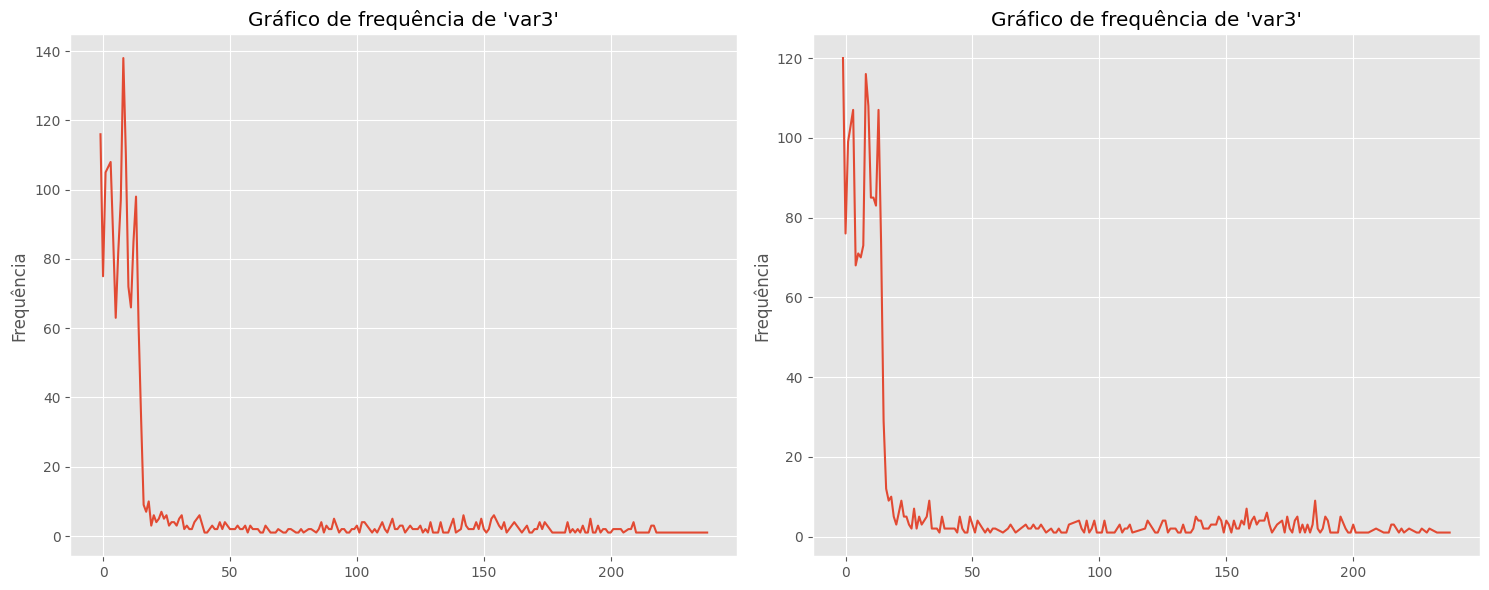

****************************************************************************************************
Valor percentual (5 maiores) na base de treino para 'var3':
Valor	 Perc%
 8    7.439353
-1    6.253369
 9    5.929919
 3    5.822102
 1    5.660377
Name: var3, dtype: float64
****************************************************************************************************
Valor percentual (5 menores) na base de treino para 'var3':
Valor	 Perc%
184    0.053908
128    0.053908
41     0.053908
40     0.053908
106    0.053908
Name: var3, dtype: float64
****************************************************************************************************
Valor percentual (5 maiores) na base de teste para 'var3':
Valor	 Perc%
-1     6.465517
 8     6.250000
 9     5.818966
 13    5.765086
 3     5.765086
Name: var3, dtype: float64
****************************************************************************************************
Valor percentual (5 menores) na base de teste para 'var3':
Val

In [26]:
df_train['var3'].replace(-999999,-1,inplace=True)
df_test['var3'].replace(-999999,-1,inplace=True)
#plotting frequency with no 2 value for var3 and value_counts with percentage
valuecounts_plot('var3',df_train[ df_train['var3']!=2 ],df_test[ df_test['var3']!=2 ])

Com os gráficos, percebe-se muita similaridade nas bases de treino e teste.

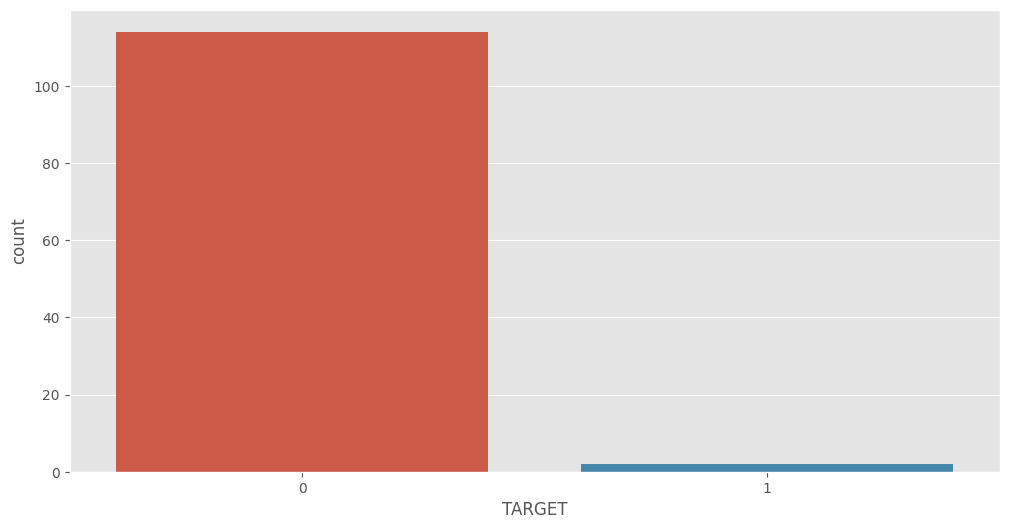

In [27]:
mask = df_train[df_train['var3']==-1]
sns.countplot(x=mask['TARGET']);

In [28]:
(mask['TARGET'].value_counts()/mask['TARGET'].count())*100

0    98.275862
1     1.724138
Name: TARGET, dtype: float64

O número de clientes insatisfeitos nessa amostra são 2.
O número de clientes satisfeitos nessa amostra são 114.

Podemos substituir todos os valores -1 por 2 (categoria mais frequente neste recurso) para treinar e testar, pois a partir dos dados de treino também há clientes insatisfeitos e também o número total é muito pequeno

In [29]:
df_train['var3'].replace(-1,2,inplace=True)
df_test['var3'].replace(-1,2,inplace=True)

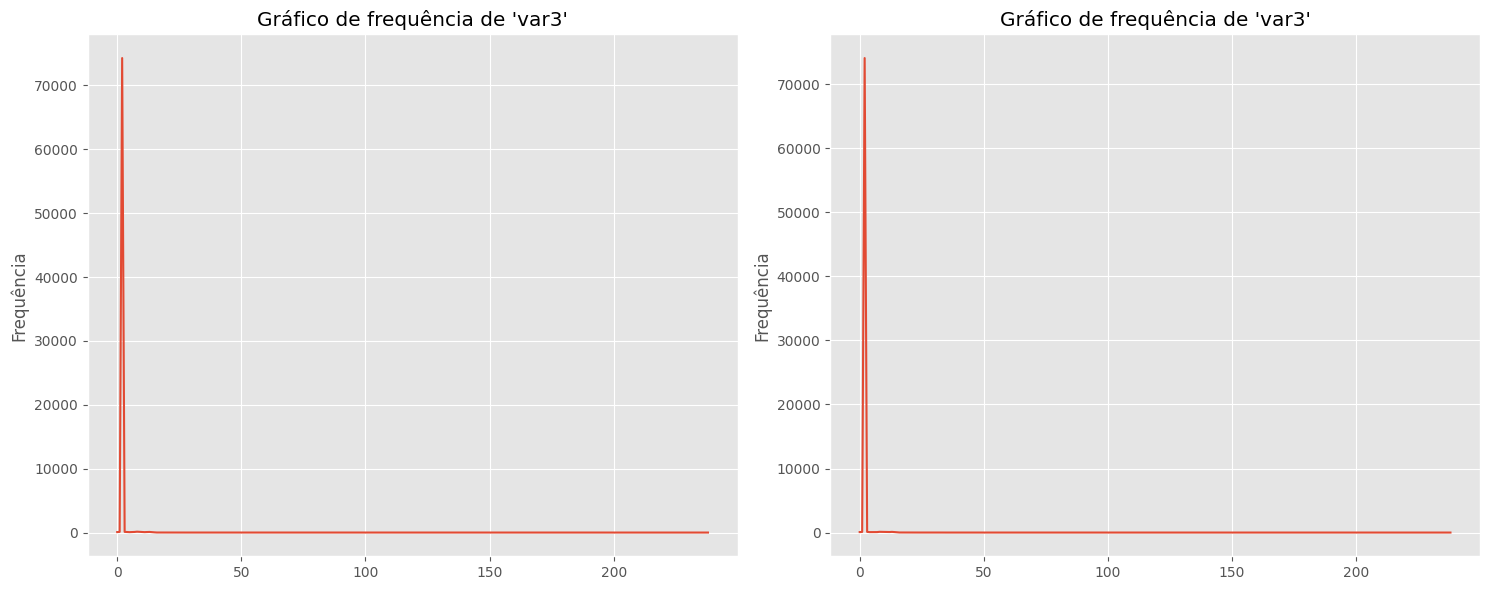

****************************************************************************************************
Valor percentual (5 maiores) na base de treino para 'var3':
Valor	 Perc%
2    97.712444
8     0.181531
9     0.144699
3     0.142068
1     0.138122
Name: var3, dtype: float64
****************************************************************************************************
Valor percentual (5 menores) na base de treino para 'var3':
Valor	 Perc%
177    0.001315
87     0.001315
151    0.001315
215    0.001315
191    0.001315
Name: var3, dtype: float64
****************************************************************************************************
Valor percentual (5 maiores) na base de teste para 'var3':
Valor	 Perc%
2     97.710306
8      0.152998
9      0.142446
13     0.141127
3      0.141127
Name: var3, dtype: float64
****************************************************************************************************
Valor percentual (5 menores) na base de teste para 'var3':
Val

In [30]:
valuecounts_plot('var3',df_train,df_test)

### Coluna Var15

In [31]:
max_ = df_train['var15'].max()
min_ = df_train['var15'].min()
print("O valor mínimo de var15 é %i e valor máximo de var15 é %i."%(min_,max_ ))

O valor mínimo de var15 é 5 e valor máximo de var15 é 105.


Como o valor de var15 é de 5 a 105, podemos assumir que esse recurso talvez indique a idade do cliente.

In [32]:
def histplot_comb(col,train=df_train,test=df_test,size=(20,5),bins=20):
    """
    Creates a histplots of train and 
    test data for feature var
    """
    var=col
    plt.subplots(1,2,figsize=size)
    #plotting train data
    plt.subplot(121)
    plt.title("Distribuição da coluna {} na base de treino".format(var))
    plt.ylabel('Nº de Ocorrências')
    plt.xlabel(var)
    plt.hist(train[var],bins=bins)
    #plotting test data
    plt.subplot(122)
    plt.title("Distribuição da coluna {} na base de teste".format(var))
    plt.ylabel('Nº de Ocorrências')
    plt.xlabel(var)
    plt.hist(test[var],bins=bins)
    
    plt.show()
    print("")

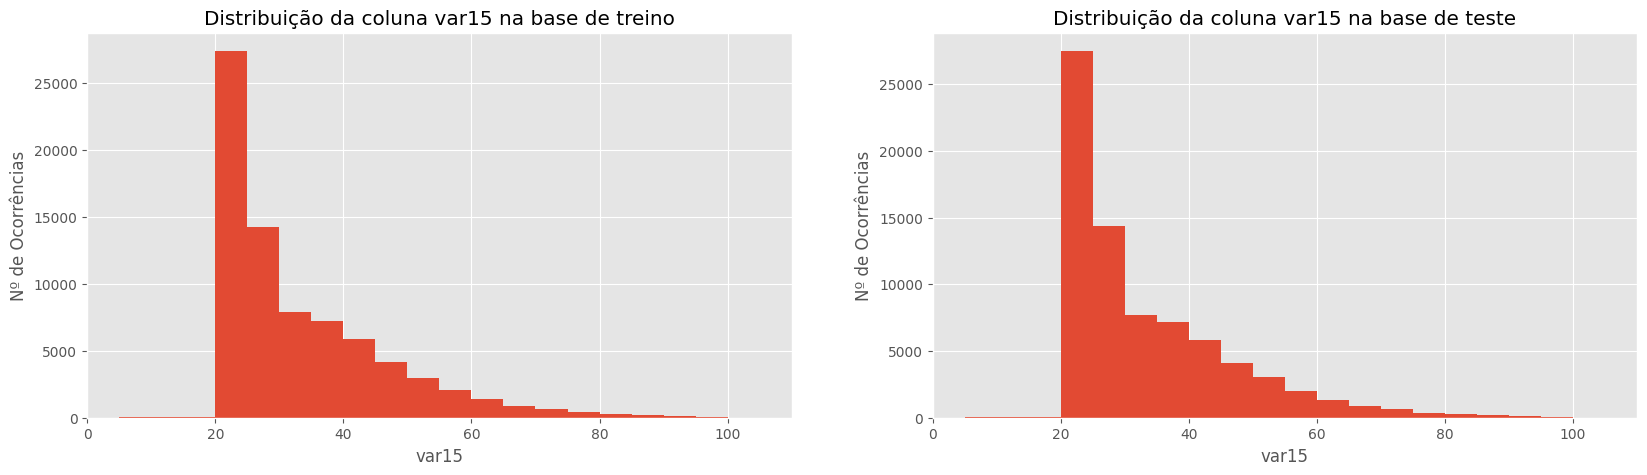


Clientes cuja idade é abaixo de 30 constitui cerca de 56.15% da base de treino.
A idade mínima na base de treino é 5 enquanto a idade máxima é 105.

Clientes cuja idade é abaixo de 30 constitui cerca de 56.58% da base de teste.
A idade mínima na base de teste é 5 enquanto a idade máxima é 105.


In [33]:
#plotting histplot for train and test data
histplot_comb('var15')


#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html
percentile = stats.percentileofscore(df_train['var15'].values,30)
print("Clientes cuja idade é abaixo de 30 constitui cerca de %.2f%% da base de treino."%(percentile))
print("A idade mínima na base de treino é %i enquanto a idade máxima é %i."%(df_train.var15.min(),df_train.var15.max()))
print("")
percentile = stats.percentileofscore(df_test['var15'].values,30)
print("Clientes cuja idade é abaixo de 30 constitui cerca de %.2f%% da base de teste."%(percentile))
print("A idade mínima na base de teste é %i enquanto a idade máxima é %i."%(df_test.var15.min(),df_test.var15.max()))

Ambos os dados de treino e teste tiveram distribuições semelhantes, ambos consistindo em clientes mais jovens. Agora vamos ver se todos os mais jovens estão satisfeitos.

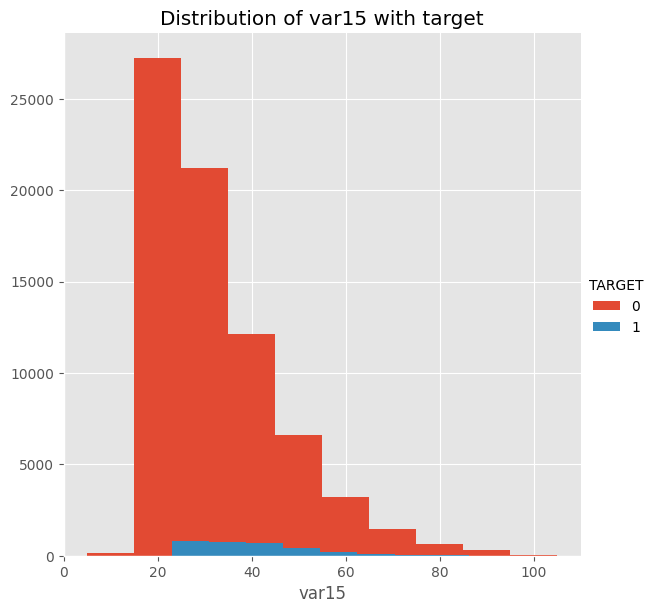

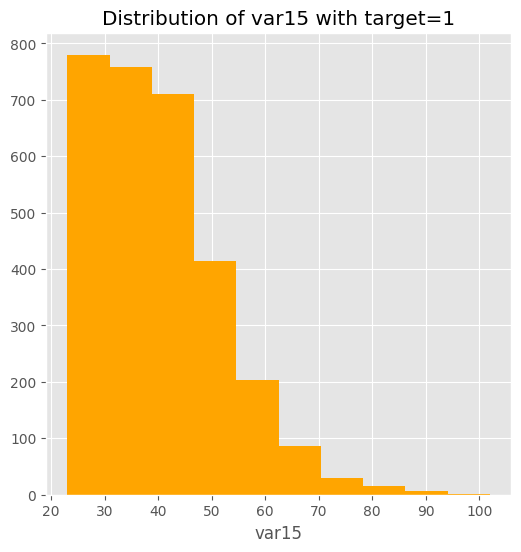

The minimum age of the unsatisfied customer is 23 and maximum age of the unsatisfied customer is 102 .


In [34]:
#plotting the distribution with target
sns.FacetGrid(data=df_train,hue='TARGET',height=6).map(plt.hist,'var15').add_legend()
plt.title("Distribution of var15 with target")
plt.show()

print("")
print("")

mask = df_train[(df_train['TARGET']==1)]
plt.figure(figsize=(6,6))
plt.hist(mask['var15'],color='orange')
plt.title("Distribution of var15 with target=1")
plt.xlabel('var15')
plt.show()

max_ = mask['var15'].max()
min_ = mask['var15'].min()
print("The minimum age of the unsatisfied customer is %i and maximum age of the unsatisfied customer is %i ."%(min_,max_ ))

Podemos ver no diagrama acima que a maioria dos jovens está satisfeita. Assim, podemos criar uma nova coluna que informa se um cliente tem menos de 23 anos ou não.

In [35]:
#create a new feature which tells whether a customer is below 23 years old or not
for df in [df_train,df_test]:
    df['var15_below_23'] = np.zeros(df.shape[0],dtype=int)
    df.loc[df['var15']<23,'var15_below_23']=1

In [36]:
new_feature = ['var15_below_23']
#binning age feature into 5 bins
_,bins = pd.cut(df_train['var15'].values,5,retbins=True) #getting the bins
print(_ )

[(4.9, 25.0], (25.0, 45.0], (4.9, 25.0], (25.0, 45.0], (25.0, 45.0], ..., (45.0, 65.0], (25.0, 45.0], (4.9, 25.0], (4.9, 25.0], (45.0, 65.0]]
Length: 76020
Categories (5, interval[float64]): [(4.9, 25.0] < (25.0, 45.0] < (45.0, 65.0] < (65.0, 85.0] < (85.0, 105.0]]


Esses serão os bins que definiremos.

In [37]:
#converting var15 values to bin values
df_train['var15'] = pd.cut(df_train['var15'].values,bins,labels=False)
df_test['var15'] = pd.cut(df_test['var15'].values,bins,labels=False)

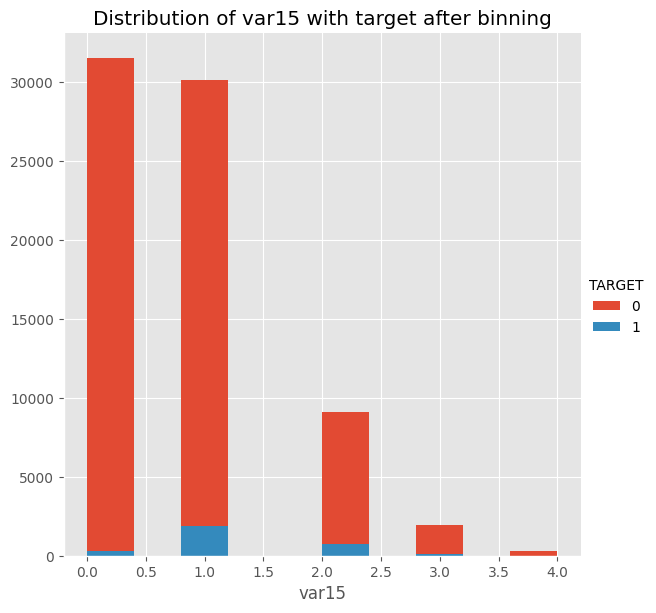

In [38]:
#plotting the binned feature
sns.FacetGrid(data=df_train,hue='TARGET',height=6).map(plt.hist,'var15').add_legend()
plt.title("Distribution of var15 with target after binning")
plt.show()

### Coluna var38 

In [39]:
print("O valor mínimo de var38 encontrado foi %.3f e o valor máximo de var38 é %.3f"%(df_train.var38.min(),df_train.var38.max()))

O valor mínimo de var38 encontrado foi 5163.750 e o valor máximo de var38 é 22034738.760


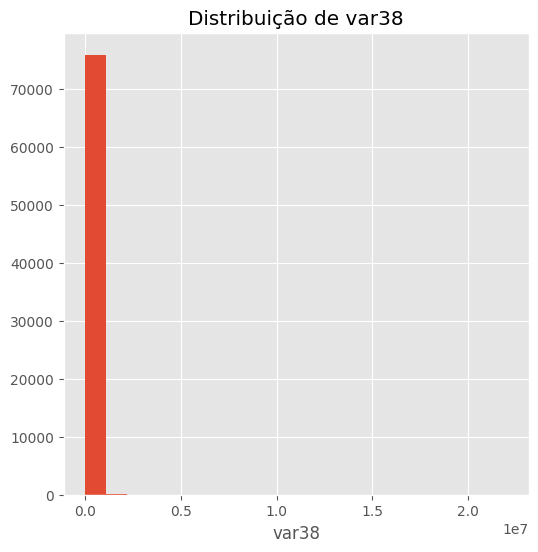

In [40]:
plt.figure(figsize=(6,6))
plt.hist(df_train['var38'],bins=20)
plt.title("Distribuição de var38")
plt.xlabel('var38')
plt.show()

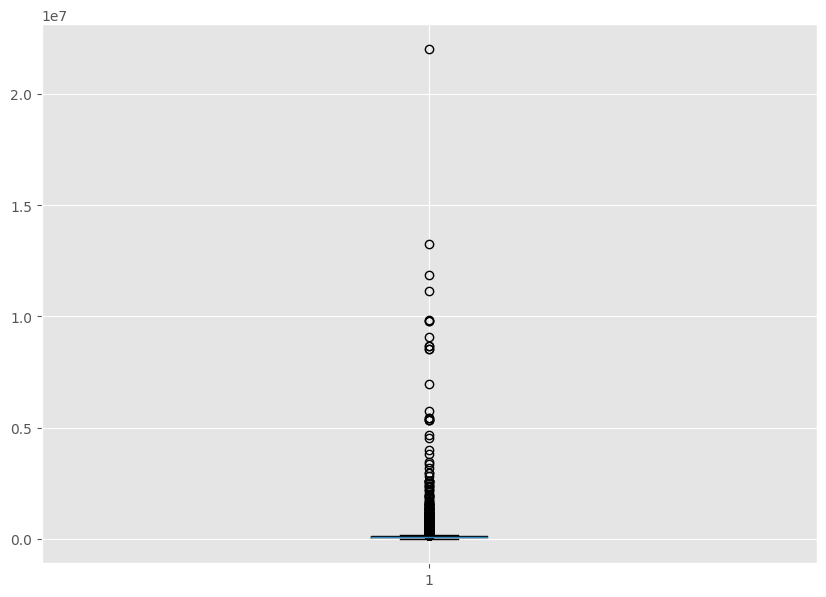

In [41]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_train['var38'])
 
# show plot
plt.show()

In [42]:
df_train.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
                 ...  
318211.440000        1
73069.260000         1
36425.370000         1
163515.900000        1
159395.520000        1
Name: var38, Length: 57736, dtype: int64

Aqui não podemos obter nenhuma informação, pois um valor está tendo uma frequência de distribuição muito alta. Vamos imprimir os valores de cada percentil.

In [43]:
for i in np.arange(0,1.1,0.1):
    print('%i percentil : %i'%(i*100,np.quantile(df_train.var38.values,i)))

0 percentil : 5163
10 percentil : 48070
20 percentil : 61496
30 percentil : 74152
40 percentil : 88571
50 percentil : 106409
60 percentil : 117310
70 percentil : 117310
80 percentil : 132859
90 percentil : 182585
100 percentil : 22034738


Ahaa! Podemos ver que há uma enorme diferença entre o valor do percentil 0 e o valor do percentil 10. Este é o mesmo caso para o valor do percentil 90 e o valor do percentil 100.

In [44]:
for i in np.arange(0,0.11,0.025):
    print('%.2f percentile : %i'%(i*100,np.quantile(df_train.var38.values,i)))

0.00 percentile : 5163
2.50 percentile : 32664
5.00 percentile : 39255
7.50 percentile : 44098
10.00 percentile : 48070


In [45]:
for i in np.arange(0.9,1.01,0.025):
    print('%.2f percentile : %i'%(i*100,np.quantile(df_train.var38.values,i)))

90.00 percentile : 182585
92.50 percentile : 206707
95.00 percentile : 242780
97.50 percentile : 323173
100.00 percentile : 22034738


Podemos ver que o mínimo e o máximo são muito diferentes em magnitude do restante da amostra.

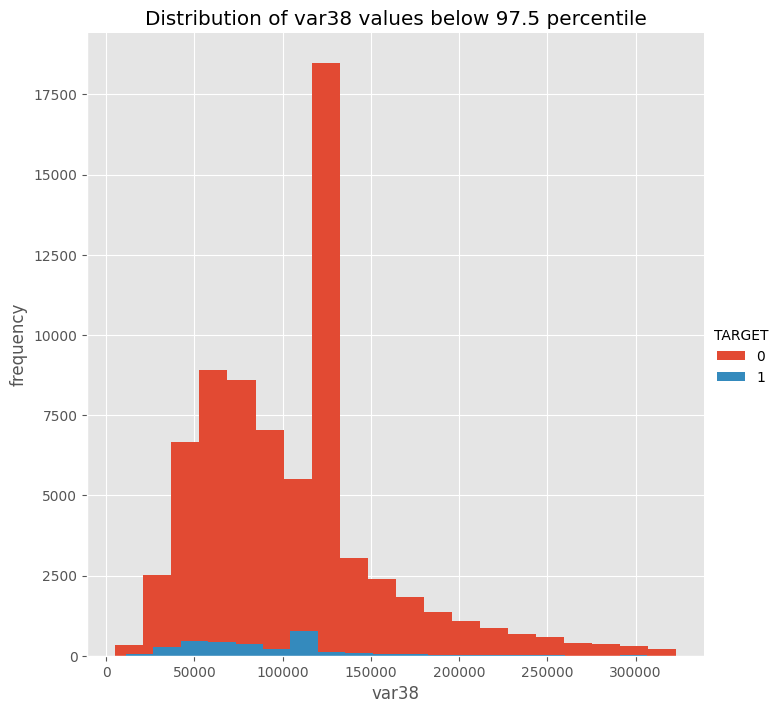

In [46]:
mask = df_train[df_train['var38']<=np.quantile(df_train.var38.values,0.975)]
sns.FacetGrid(data=mask,hue='TARGET',height=7).map(plt.hist,'var38',bins=20).add_legend()
plt.title('Distribution of var38 values below 97.5 percentile')
plt.ylabel("frequency")
plt.show()

Podemos ver que o gráfico acima está inclinado para a direita com um pico estranho entre 100.000 e 150.000. Podemos aplicar a transformação de log e verificar a distribuição resultante.

C:\users\t696994\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


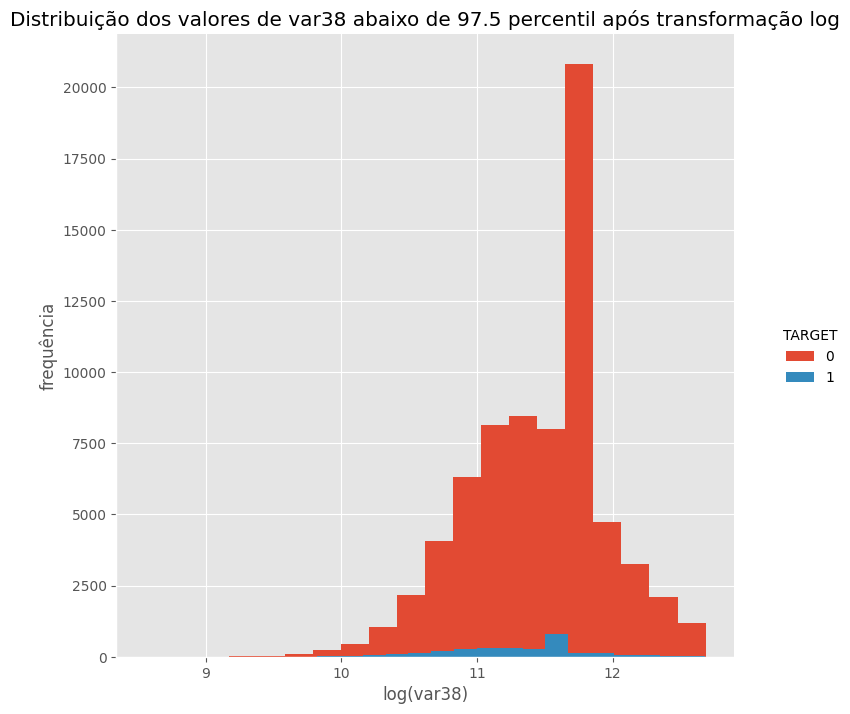

In [47]:
mask.loc[:,'var38'] = np.log(mask.var38).values
sns.FacetGrid(data=mask,hue='TARGET',height=7).map(plt.hist,'var38',bins=20).add_legend()
plt.title("Distribuição dos valores de var38 abaixo de 97.5 percentil após transformação log")
plt.xlabel('log(var38)')
plt.ylabel("frequência")
plt.show()


Isso é muito melhor do que o anterior. Portanto, aplicamos a transformação de log ao recurso var38.

<Figure size 800x600 with 0 Axes>

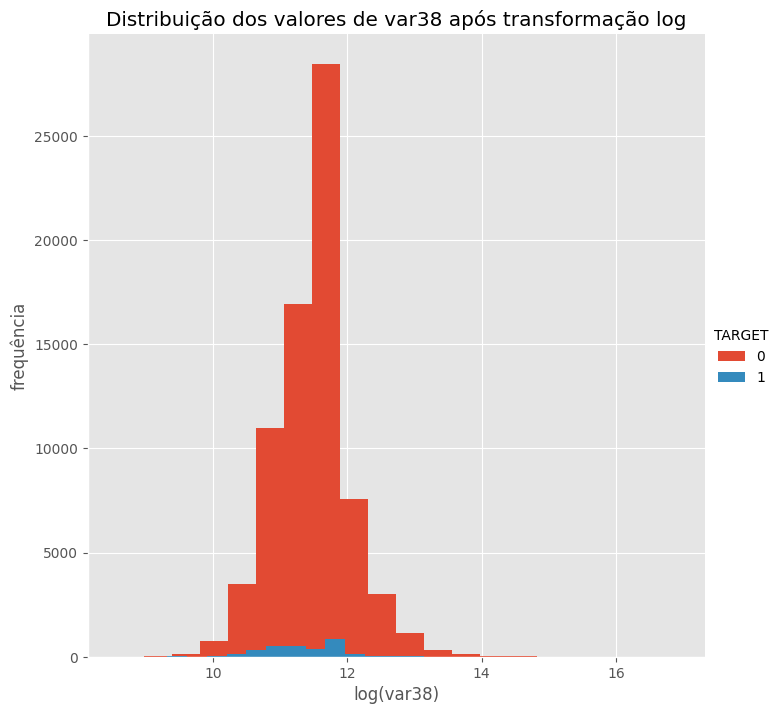

In [48]:
df_train.loc[:,'var38'] = np.log(df_train['var38']).values
plt.figure(figsize=(8,6))
sns.FacetGrid(data=df_train,hue='TARGET',height=7).map(plt.hist,'var38',bins=20).add_legend()
plt.title("Distribuição dos valores de var38 após transformação log")
plt.xlabel('log(var38)')
plt.ylabel("frequência")
plt.show()


### 7. Analisando colunas com palavras-chave

### 8. Matriz de Correlação

<AxesSubplot:>

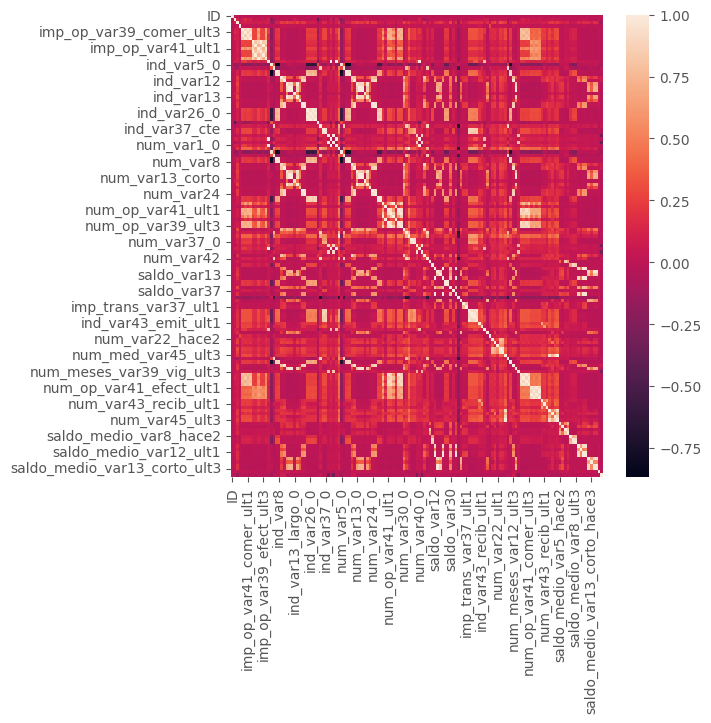

In [49]:
#plotting correlation matrix
corr = df_train.drop('TARGET',axis=1).corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr)

Podemos ver que existem características altamente correlacionadas umas com as outras. Podemos criar um conjunto de dados que remove todos os recursos altamente correlacionados, mantendo um de lado para evitar o overfitting.

In [50]:
#correlation values between target
corr_df = pd.DataFrame(df_train.corr()['TARGET']).drop(['ID'])
corr_df.sort_values(by='TARGET',axis=0,ascending=0,inplace=True)
corr_df

,TARGET
TARGET,1.000000
var15,0.111137
var36,0.102919
ind_var8_0,0.046665
num_var8_0,0.046622
...,...
ind_var5,-0.135349
num_var42,-0.135693
num_var30,-0.138289
num_meses_var5_ult3,-0.148253


In [51]:
t = 10**-4
print(corr_df[abs(corr_df['TARGET'])<=t])
print("Existem %i variáveis que estão abaixo de %.5f de correlação com a coluna 'TARGET'."%(corr_df[abs(corr_df['TARGET'])<=t].shape[0],\
                                                                                  t))


                      TARGET
imp_ent_var16_ult1 -0.000017
num_var37_med_ult2 -0.000029
Existem 2 variáveis que estão abaixo de 0.00010 de correlação com a coluna 'TARGET'.


Podemos remover essas colunas.

In [52]:
feat_to_remove = list(corr_df[abs(corr_df['TARGET'])<=t].index)
for df in [df_train,df_test]:
    df.drop(feat_to_remove,axis=1,inplace=True)
df_train.shape,df_test.shape

((76020, 142), (75818, 141))

### 9. Salvando as alterações em arquivo .pkl

In [53]:
with open('train_1.pickle', 'wb') as handle:
    pickle.dump(df_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [54]:
with open('test_1.pickle', 'wb') as handle:
    pickle.dump(df_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 10. Oversampling das bases

In [ ]:
# !pip install imblearn

Devido ao desbalanceamento das bases, vamos utilizar a técnica de Oversampling que consiste em ampliar o conjunto de registros que possui menor quantidade de ocorrências. No caso, vamos aumentar os dados de clientes insatisfeitos (TARGET = 1).

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['TARGET','ID'], axis = 1), df_train.TARGET, stratify = df_train.TARGET, train_size = 0.80 ,random_state = 42)

In [115]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(df_train.drop(['TARGET','ID'], axis = 1),df_train.TARGET)

In [118]:
X_over.shape, y_over.shape

((76020, 142), (75818, 141))

In [117]:
(y_over.value_counts()/y_over.count())*100

0    50.0
1    50.0
Name: TARGET, dtype: float64